In [1]:
import numpy as np
import pandas as pd
from scifit.solvers import FitSolver1D
from scipy import special, stats

In [2]:
class Model(FitSolver1D):
    @staticmethod
    def model(x, b, scale):
        return stats.rice.pdf(x[:,0], b=b, loc=1., scale=scale)

In [3]:
model = Model()

In [4]:
data = model.synthetic_dataset(xmin=0, xmax=50, parameters=(5, 7), sigma=0.001)

In [5]:
sol = model.fit(data)#, p0=[10, 10])

In [6]:
sol

{'success': True,
 'parameters': array([10.12061212,  0.17483021]),
 'covariance': array([[ 9.15485593e+07, -1.16036374e+06],
        [-1.16036374e+06,  1.47074297e+04]]),
 'info': {'fvec': array([-4.71435164e-01,  1.19094253e+00, -4.43980308e-03,  3.11375675e-01,
          7.16317150e-01, -9.00161758e-01, -8.95990467e-01,  5.42059560e-01,
         -2.43815665e-01,  1.72864208e+00, -2.23292174e+00, -3.12735947e+00,
         -4.89893954e+00, -4.81465383e+00, -1.07773548e+01, -1.69544017e+01,
         -2.46897138e+01, -3.29618377e+01, -4.26177377e+01, -4.74983203e+01,
         -5.45375784e+01, -5.67696526e+01, -5.68235357e+01, -5.30556819e+01,
         -4.70835327e+01, -3.70418335e+01, -2.95875650e+01, -1.91394667e+01,
         -1.41027254e+01, -1.02182417e+01]),
  'nfev': 66,
  'fjac': array([[-4.32095366e+02, -5.47674125e+00,  1.00000000e+00,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+

<Axes: title={'center': 'Fit Plot: \nn=30, $R^2$=-0.838, $\\chi^2_r$=23616.141, $P(\\chi^2_{28} \\geq 843.434 \\,|\\, H_0) = 0.0000$\n$\\beta \\pm s_{\\beta}$ = (10.1 ± 9.57e+03; 0.175 ± 121)'}, xlabel='Feature, $x_1$', ylabel='Target, $y$'>

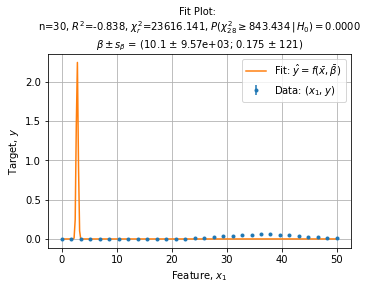

In [7]:
model.plot_fit()

<Axes: title={'center': 'Fit Log-Loss Plot: \nn=30, $R^2$=-0.838, $\\chi^2_r$=23616.141, $P(\\chi^2_{28} \\geq 843.434 \\,|\\, H_0) = 0.0000$\n$\\beta \\pm s_{\\beta}$ = (10.1 ± 9.57e+03; 0.175 ± 121)'}, xlabel='Parameter, $\\beta_{1}$', ylabel='Parameter, $\\beta_{2}$'>

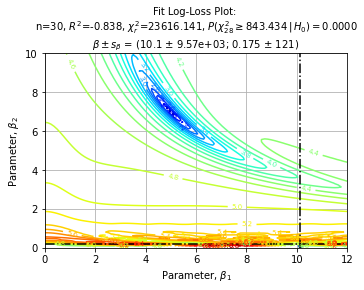

In [8]:
domains = pd.DataFrame({"min": [0, 0], "max": [12, 10]}).T
model.plot_loss(domains=domains, levels=30, log_loss=True)

<Axes: title={'center': 'Fit Log-Loss Plot: \nn=30, $R^2$=-0.838, $\\chi^2_r$=23616.141, $P(\\chi^2_{28} \\geq 843.434 \\,|\\, H_0) = 0.0000$\n$\\beta \\pm s_{\\beta}$ = (10.1 ± 9.57e+03; 0.175 ± 121)'}, xlabel='Parameter, $\\beta_{1}$', ylabel='Parameter, $\\beta_{2}$'>

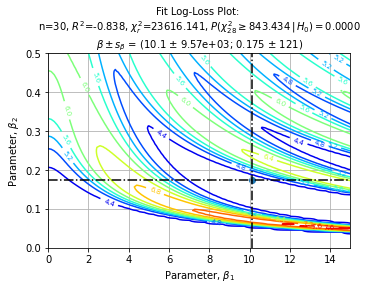

In [9]:
domains = pd.DataFrame({"min": [0, 0.], "max": [15, 0.5]}).T
model.plot_loss(domains=domains, levels=10, log_loss=True)